<a href="https://colab.research.google.com/github/victor-radermecker/Capstone_JPMorgan/blob/main/Google_Earth_Engine/Copy_of_dynamic_world_bulk_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap
!pip install geopandas
!pip install imagecodecs

In [4]:
import pandas as pd
import ee
import geemap
import imageio
from matplotlib import pyplot as plt
import sys
import warnings
import cv2
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
#drive.mount('/content/drive', force_remount = True)
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/src/')
from fishnet import Fishnet

In [6]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=VsUFBESVebtHRg12DRRU3ztU_B0MSOmi0F8Yhe9w3T8&tc=7RFHVtlPpXF9w_vjYvGjVaDrvUil69th6AnZoAglLnE&cc=Tcs_anl7JzIEotztXf78_yQwJUCokVDBWaZkb4Owges

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk5Jb2oQSvOGPd2ndRZXLWfrySJnokkTdbC6Ms6D8wJjhX5DH3pEaPU

Successfully saved authorization token.


In [7]:
ee.Initialize(project="jpmorgancapstone")

# Generating FishNet

In [78]:
"""
# Create an instance of the Fishnet class
fishnet_creator = Fishnet('../Gis/Texas_State_Boundary/State.shp', 0.25, overlay_method='union', clip=False) # Victor

# Create the fishnet
fishnet_creator.create_fishnet()
"""

"\n# Create an instance of the Fishnet class\nfishnet_creator = Fishnet('../Gis/Texas_State_Boundary/State.shp', 0.25, overlay_method='union', clip=False) # Victor\n\n# Create the fishnet\nfishnet_creator.create_fishnet()\n"

In [77]:
# fishnet_creator.batch(4)  # creates batches of 4miles x 4miles

In [ ]:
# fishnet_creator.save('../Gis/Fishnet/fishnet_quarter_mile.pkl') # saves the fishnet to a pickle file

In [79]:
# load the object
fishnet_creator = Fishnet.load('/content/drive/MyDrive/Code/Gis/Fishnet/fishnet_quarter_mile.pkl')

In [71]:
fishnet = fishnet_creator.fishnet

In [72]:
fishnet.head()

,id,geometry,batch_id
0,0,"POLYGON ((-106.64200 36.49615, -106.64200 36.5...",0
1,1,"POLYGON ((-106.63776 36.49615, -106.63776 36.5...",0
2,2,"POLYGON ((-106.63353 36.49615, -106.63353 36.5...",0
3,3,"POLYGON ((-106.62930 36.49615, -106.62930 36.5...",0
4,4,"POLYGON ((-106.62506 36.49615, -106.62506 36.5...",0


In [73]:
for row in fishnet["geometry"]:
  print(row)
  break

POLYGON ((-106.6419964685168 36.49615276651688, -106.6419964685168 36.50038609100005, -106.64622979299997 36.50038609100005, -106.64622979299997 36.49615276651688, -106.6419964685168 36.49615276651688))


## Filtering

If we only want to focus on specific area of the map (to make the computation quicker), we can use the filtering method below.

In [11]:
region = [-95.799944,29.374853,-95.028636,29.795492]

# Filter the fishnet by the larger bounding box
fishnet_creator.filter_fishnet_by_bbox(region)
fishnet_creator.filtered_fishnet

,id,geometry,batch_id
4916194,4916194,"POLYGON ((-95.79622 29.79480, -95.79622 29.799...",19172
4916195,4916195,"POLYGON ((-95.79199 29.79480, -95.79199 29.799...",19172
4916196,4916196,"POLYGON ((-95.78775 29.79480, -95.78775 29.799...",19172
4916197,4916197,"POLYGON ((-95.78352 29.79480, -95.78352 29.799...",19172
4916198,4916198,"POLYGON ((-95.77929 29.79480, -95.77929 29.799...",19172
...,...,...,...
5226772,5226772,"POLYGON ((-95.04269 29.37147, -95.04269 29.375...",20541
5226773,5226773,"POLYGON ((-95.03845 29.37147, -95.03845 29.375...",20541
5226774,5226774,"POLYGON ((-95.03422 29.37147, -95.03422 29.375...",20541
5226775,5226775,"POLYGON ((-95.02999 29.37147, -95.02999 29.375...",20541


In [12]:
fishnet_creator.filtered_batches

,batch_id,geometry
19172,19172,"POLYGON ((-95.74119 29.79480, -95.74119 29.862..."
19173,19173,"POLYGON ((-95.67345 29.79480, -95.67345 29.862..."
19174,19174,"POLYGON ((-95.60572 29.79480, -95.60572 29.862..."
19175,19175,"POLYGON ((-95.53799 29.79480, -95.53799 29.862..."
19176,19176,"POLYGON ((-95.47025 29.79480, -95.47025 29.862..."
...,...,...
20537,20537,"POLYGON ((-95.26706 29.32067, -95.26706 29.388..."
20538,20538,"POLYGON ((-95.19932 29.32067, -95.19932 29.388..."
20539,20539,"POLYGON ((-95.13159 29.32067, -95.13159 29.388..."
20540,20540,"POLYGON ((-95.06386 29.32067, -95.06386 29.388..."


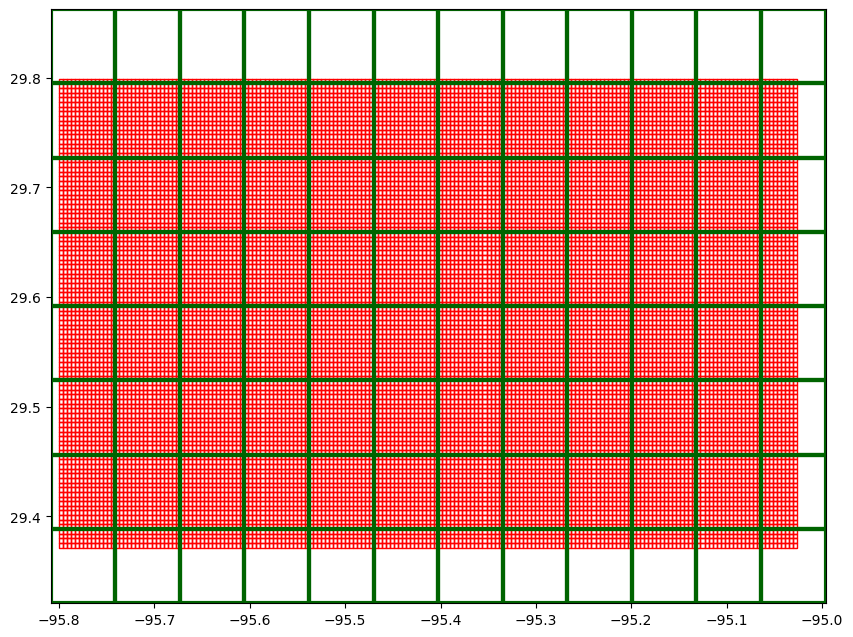

In [13]:
fishnet_creator.plot_filtered_fishnet(zoom=True)

# Now, we need to export the image for each batch. 

# `@TODO: Label Aggregation and Extraction - After Image Extraction`

## Extract images in bulk for the fishnet

In [14]:
fishnet_creator.fishnet["batch_id"]

0              0
1              0
2              0
3              0
4              0
           ...  
7818971    30651
7818972    30651
7818973    30651
7818974    30651
7818975    30651
Name: batch_id, Length: 7818976, dtype: int64

# understand how to merge the things and how to take things from fishnet loaded instead of reloading every time

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

def latlong_to_pixel(bbox, region, img_shape):
    """
    Convert lat/long coordinates to pixel coordinates.

    Parameters:
    bbox (tuple): A tuple of (xmin, ymin, xmax, ymax) representing the bounding box.
    region (list): A list of [x1, x2, x3, x4] representing the lat/long coordinates of the 4 image corners.
    img_shape (tuple): A tuple of (height, width) representing the image shape.

    Returns:
    tuple: A tuple of (xmin, ymin, xmax, ymax) representing the pixel coordinates of the bounding box.
    """

    img_height, img_width = img_shape

    x1, x2, x3, x4, _ = region.getInfo()["coordinates"][0] # WHAT'S WRONG WITH THIS?

    # IF TAKE LAT LONG WHY WASN'T DOING THIS BEFORE?
    min_lon, max_lon = min(x1[0], x3[0]), max(x1[0], x3[0])
    min_lat, max_lat = min(x2[1], x4[1]), max(x2[1], x4[1])
    xmin, ymin, xmax, ymax = bbox

    # Normalize the bounding box coordinates
    x_min_pixel = int((xmin - min_lon) / (max_lon - min_lon) * img_width)
    x_max_pixel = int((xmax - min_lon) / (max_lon - min_lon) * img_width)
    y_min_pixel = int((1 - (ymax - min_lat) / (max_lat - min_lat)) * img_height)
    y_max_pixel = int((1 - (ymin - min_lat) / (max_lat - min_lat)) * img_height)


    return x_min_pixel, y_min_pixel, x_max_pixel, y_max_pixel

def get_pixel_coordinates(geodataframe):
    """
    Convert lat/long coordinates to pixel coordinates.

    Parameters:
    geodataframe (geopandas.geodataframe.GeoDataFrame): A geodataframe containing the bounding boxes.

    Returns:
    pandas.Series: A pandas series containing the pixel coordinates of the bounding boxes.
    """
    # SLOW, WHY NEED TO CALL LATLON
    pixel_coordinates = geodataframe['geometry'].apply(lambda x: latlong_to_pixel(x.bounds, region, (img_height, img_width)))
    return pixel_coordinates

from PIL import Image
import geopandas as gpd
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm

def mean_pixel_values(img_arr, bounding_boxes_gdf):
    """
    Compute the mean pixel value within each bounding box in a geodataframe, for a given image.

    Parameters:
    -----------
    img_arr: numpy.ndarray
        NumPy array of the image.
    bounding_boxes_gdf: geopandas.GeoDataFrame
        Geodataframe of bounding boxes with IDs.

    Returns:
    --------
    list:
        A list of mean pixel values for each bounding box in the geodataframe.
    """
    print("Converting image to PIL object...")
    # Convert the NumPy array to a PIL Image object
    img = Image.fromarray(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))

    print("Converting bounding box coordinates to pixel coordinates...")
    # Convert the bounding box coordinates to pixel coordinates
    bounding_boxes_gdf["PixelCoordinates"] = bounding_boxes_gdf["ImageCoordinates"].apply(lambda x: (int(x[0]), int(x[1]), int(x[2]), int(x[3])))

    print("Extracting pixels from each bounding box and computing mean pixel value...")
    # Compute the mean pixel value within each bounding box
    mean_pixel_values = []
    with tqdm(total=len(bounding_boxes_gdf)) as pbar:
        for idx, row in bounding_boxes_gdf.iterrows():
            pixel_box = img.crop(row["PixelCoordinates"])
            mean_pixel_value = np.mean(pixel_box) #int(pd.DataFrame(np.array(pixel_box.getdata()).reshape((-1, 3))).mean().mean())
            mean_pixel_values.append(mean_pixel_value) # compute percentage of built
            pbar.update(1)

    return mean_pixel_values


def get_unique_colors(image):
    # Reshape the image array into a 2D array of shape (num_pixels, 3)
    reshaped_image = image.reshape(-1, image.shape[-1])

    # Find unique color triples using numpy
    unique_colors = np.unique(reshaped_image, axis=0)

    return unique_colors

unique_colors = get_unique_colors(image)
print(unique_colors)

def extract_label(image, color):
    red_pixels = np.all([
        image[:, :, 0] == color[0],      # Red channel 
        image[:, :, 1] == color[1],      # Green channel
        image[:, :, 2] == color[2]       # Blue channel
    ], axis=0)
    
    extracted_image = np.zeros_like(image)
    extracted_image[red_pixels] = [255,255,255] # Extracted image is black & white
    
    return extracted_image



[[  0   0   0]
 [ 57 125  73]
 [ 65 155 223]
 [122 135 198]
 [136 176  83]
 [165 155 143]
 [179 159 225]
 [196  40  27]
 [223 195  90]
 [228 150  53]]


In [ ]:
filtered_fishnet = fishnet_creator.filtered_fishnet

batch = fishnet_creator.filtered_batches.iloc[1]
batch_id = batch["batch_id"]
region = ee.Geometry.Rectangle(batch['geometry'].bounds)
landcover = geemap.dynamic_world(region, startDate, endDate, return_type='visualize')

description = f'landcover_batchID_{i}'

### load image corresponding to that batch
image = imageio.imread('/content/drive/MyDrive/ ge_exports sub_region_export /' + description + '.tif')

img_height, img_width, _ = image.shape

built_pixel = [196, 40, 27] # red
built_image = extract_label(image, built_pixel)

pixel_coordinates = filtered_fishnet['geometry'].apply(lambda x: latlong_to_pixel(x.bounds, region, (img_height, img_width)))


In [55]:
len(filtered_fishnet['geometry'])

18483

In [59]:
count = 0

for geom in filtered_fishnet['geometry']:
  print(geom)
  break

  

POLYGON ((-95.79621914262326 29.79480010965136, -95.79621914262326 29.799033434134532, -95.80045246710644 29.799033434134532, -95.80045246710644 29.79480010965136, -95.79621914262326 29.79480010965136))


In [20]:
filtered_fishnet

,id,geometry,batch_id
4916194,4916194,"POLYGON ((-95.79622 29.79480, -95.79622 29.799...",19172
4916195,4916195,"POLYGON ((-95.79199 29.79480, -95.79199 29.799...",19172
4916196,4916196,"POLYGON ((-95.78775 29.79480, -95.78775 29.799...",19172
4916197,4916197,"POLYGON ((-95.78352 29.79480, -95.78352 29.799...",19172
4916198,4916198,"POLYGON ((-95.77929 29.79480, -95.77929 29.799...",19172
...,...,...,...
5226772,5226772,"POLYGON ((-95.04269 29.37147, -95.04269 29.375...",20541
5226773,5226773,"POLYGON ((-95.03845 29.37147, -95.03845 29.375...",20541
5226774,5226774,"POLYGON ((-95.03422 29.37147, -95.03422 29.375...",20541
5226775,5226775,"POLYGON ((-95.02999 29.37147, -95.02999 29.375...",20541


In [18]:
from tqdm import tqdm

#Parameters
YEAR = 2016
startDate = f'{YEAR}-05-01'
endDate = f'{YEAR}-09-01'

filtered_fishnet = fishnet_creator.filtered_fishnet

save_filtered_fishnet = gpd.GeoDataFrame(columns = ["id", "MeanPixels"])

for i in tqdm(range(len(fishnet_creator.filtered_batches))):

    batch = fishnet_creator.filtered_batches.iloc[i]
    batch_id = batch["batch_id"]
    region = ee.Geometry.Rectangle(batch['geometry'].bounds)
    landcover = geemap.dynamic_world(region, startDate, endDate, return_type='visualize')

    description = f'landcover_batchID_{i}'

    ### load image corresponding to that batch
    image = imageio.imread('/content/drive/MyDrive/ ge_exports sub_region_export /' + description + '.tif')

    img_height, img_width, _ = image.shape

    built_pixel = [196, 40, 27] # red
    built_image = extract_label(image, built_pixel)

    # from the fishnet 
    filtered_fishnet["ImageCoordinates"] = get_pixel_coordinates(filtered_fishnet)
    filtered_fishnet["MeanPixels"] = mean_pixel_values(built_image, filtered_fishnet)

    save_filtered_fishnet = pd.concat([save_filtered_fishnet, filtered_fishnet[["id", "MeanPixels"]]])

# at the end merge
mean_pixels = fishnet.merge(save_filtered_fishnet, on = "id")

  0%|          | 0/96 [05:18<?, ?it/s]


KeyboardInterrupt: ignored

<Axes: >

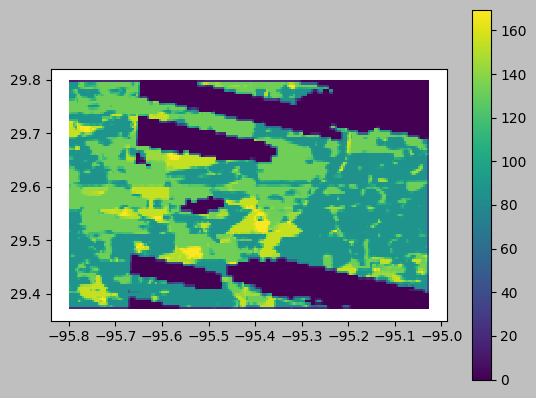

In [ ]:
# plot the MeanPixels on the fishnet and map
filtered_fishnet.plot(column='MeanPixels', cmap='viridis', legend=True)

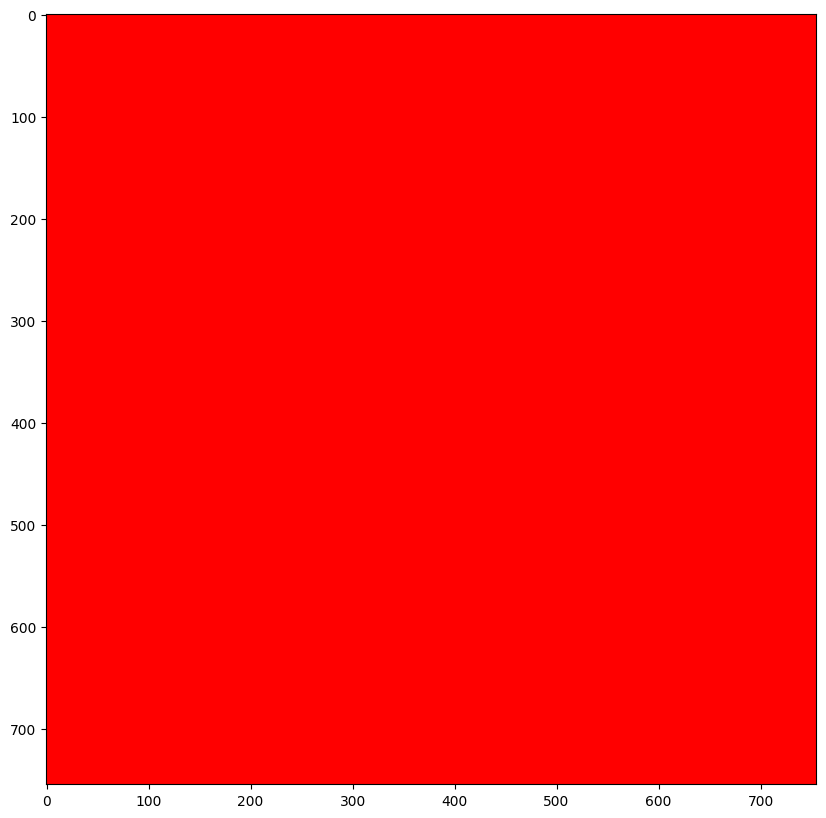

In [ ]:
# Iterate through the bounding boxes in the filtered fishnet
for _, row in filtered_fishnet.iterrows():
    bbox = row['geometry'].bounds
    pixel_bbox = latlong_to_pixel(bbox, region, (img_height, img_width))
    cv2.rectangle(image, (pixel_bbox[0], pixel_bbox[1]), (pixel_bbox[2], pixel_bbox[3]), (255, 0, 0), 20)

# Plot the image with the bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [ ]:
fishnet_creator = Fishnet('../Gis/Texas_State_Boundary/State.shp', 0.25, overlay_method='union', clip=False) # Victor
fishnet = fishnet_creator.create_fishnet()
fishnet.head()

100%|██████████| 2519/2519 [01:08<00:00, 36.77it/s]


Generating polygons...
Cliping fishinet to boundaries...


In [ ]:
# SAVE FISHNET

# Large image

In [ ]:
img_pth1 = '../Images/export2/land_labels_test_export2-0000000000-0000000000.tif'
img_pth2 = '../Images/export2/land_labels_test_export2-0000000000-0000037888.tif'
img_pth3 = '../Images/export2/land_labels_test_export2-0000000000-0000075776.tif'
img_pth4 = '../Images/export2/land_labels_test_export2-0000000000-0000151552.tif'
img_pth5 = '../Images/export2/land_labels_test_export2-0000000000-0000151552.tif'
img_pth6 = '../Images/export2/land_labels_test_export2-0000037888-0000000000.tif'
img_pth7 = '../Images/export2/land_labels_test_export2-0000037888-0000037888.tif'
img_pth8 = '../Images/export2/land_labels_test_export2-0000037888-0000075776.tif'
img_pth9 = '../Images/export2/land_labels_test_export2-0000037888-0000113664.tif'
img_pth10 = '../Images/export2/land_labels_test_export2-0000037888-0000151552.tif'

image = imageio.imread(img_pth2)
# keep only the first band
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)

(37888, 37888)
